Linear SVR    RMSE: 209,903    Support Vectors: 8
Polynomial    RMSE: 22,487    Support Vectors: 4
RBF SVR       RMSE: 24,179    Support Vectors: 5


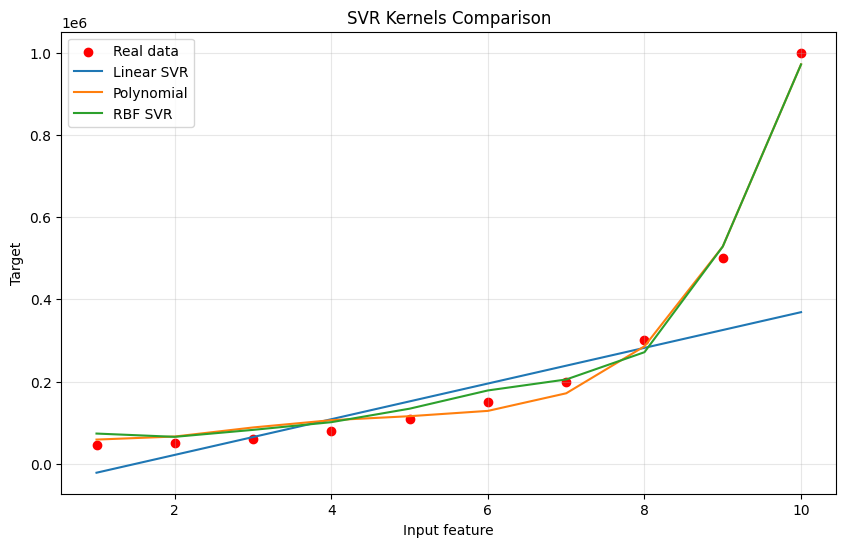

In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ────────────── Pick any URL above ──────────────
url = "https://raw.githubusercontent.com/krishnaik06/Random-Forest-Regression/master/Position_Salaries.csv"
# url = "https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Salary_Data.csv"

df = pd.read_csv(url)

# For Position_Salaries → use Level as X, Salary as y
X = df.iloc[:, 1:2].values   # Level
y = df.iloc[:, 2].values     # Salary

# Scaling (very important for SVR + rbf/poly)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1))

# Train SVR models
models = {
    'Linear SVR' : SVR(kernel='linear', C=100),
    'Polynomial' : SVR(kernel='poly', degree=4, C=100, coef0=1),
    'RBF SVR'    : SVR(kernel='rbf',   C=100, gamma='scale', epsilon=0.1)
}

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='red', label='Real data')

for name, model in models.items():
    model.fit(X_scaled, y_scaled.ravel())
    y_pred_scaled = model.predict(X_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
    
    sort_idx = np.argsort(X.ravel())
    plt.plot(X[sort_idx], y_pred[sort_idx], label=name)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    sv_count = len(model.support_vectors_)
    print(f"{name:<12}  RMSE: {rmse:,.0f}    Support Vectors: {sv_count}")

plt.title('SVR Kernels Comparison')
plt.xlabel('Input feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()